In [6]:
import pyqae.simplespark as pyspark
from pyqae.rddviz import show_dag, trace_dag
import numpy as np
lsc = pyspark.LocalSparkContext(verbose = True)

In [4]:
path_rdd = lsc.parallelize(['image_%04d.tif' % (i) for i in range(10)])
def read_image(in_str):
    return np.random.uniform(size = (1024, 1024, 1))

image_rdd = path_rdd.map(read_image)
def threshold_image(in_img):
    return in_img>0
thresh_rdd = image_rdd.map(threshold_image)

def sum_values(in_img):
    return ('bone', in_img.sum(), np.prod(in_img.shape))

sum_rdd = thresh_rdd.map(sum_values)
def select_phase(x): 
    return x[0]
def summarize_phase(x):
    return np.sum([y[1] for y in x])
group_vals = sum_rdd.groupBy(select_phase).mapValues(summarize_phase)

Creating new RDD[string] from parallelize with 10 entries
Creating new RDD[ndarray[float64](1024, 1024, 1)] from map with 10 entries
Creating new RDD[ndarray[bool](1024, 1024, 1)] from map with 10 entries
Creating new RDD[(string, int64, int64)] from map with 10 entries
Creating new RDD[(string, List[(string, int64, int64)])] from groupBy with 1 entries
Creating new RDD[(string, int64)] from mapValues with 1 entries


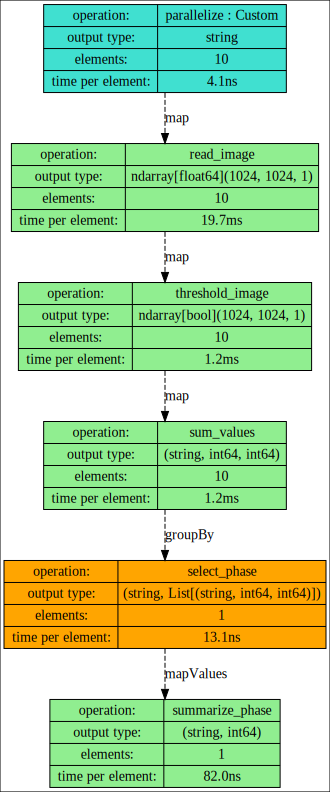

In [14]:

from IPython.display import SVG

out_dot = trace_dag(group_vals)
out_dot.set_rankdir('UD')
#out_dot.set_pagedir('LR')
out_dot.write_svg('tile_read.svg')
SVG('tile_read.svg')

In [15]:
out_dot.get_pagedir()